# Factorisation de matrices

### Yanting LI

## 1 Réduction de dimension par analyse en composantes principales (PCA)


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Reprenons les images de chiffres manuscrits :

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target

n_samples, n_features = X.shape
n_digits = len(np.unique(y))

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


### A faire :
En utilisant sklearn, 
 - afficher la base de données en dimension 2 après réduction de dimension de 64 à 2 avec une PCA ; 
 - colorer les échantillons en fonction des vraies étiquettes ;
 - réaliser un clustering par K-moyennes de la base de données en utilisant les cractéristiques en 2D obtenues par PCA. 
 - comparer au résultat obtenu précédemment sans réduction de dimension.

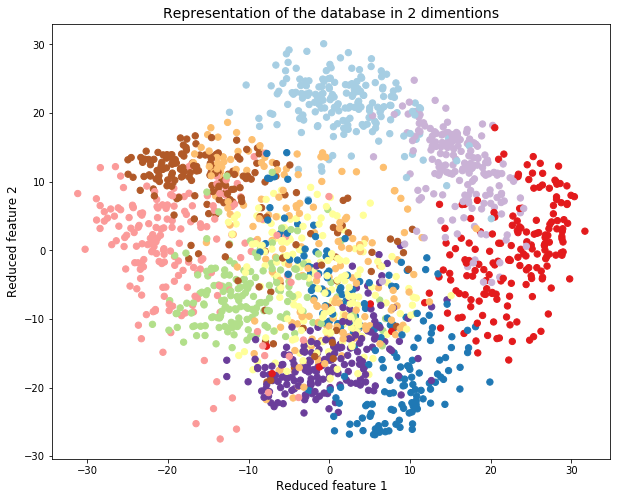

In [4]:
'''
Afficher la base de données en dimension 2 après réduction de dimension de 64 à 2 avec une PCA;
Colorer les échantillons en fonction des vraies étiquettes:
'''
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reduce the dimention from 64 to 2 with PCA:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Plot the data in 2-dimention:
plt.figure(1,figsize=(10,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=40, c=y, cmap=plt.cm.Paired)
plt.xlabel('Reduced feature 1', fontsize=12)
plt.ylabel('Reduced feature 2', fontsize=12)
plt.title('Representation of the database in 2 dimentions', fontsize=14)
plt.show()

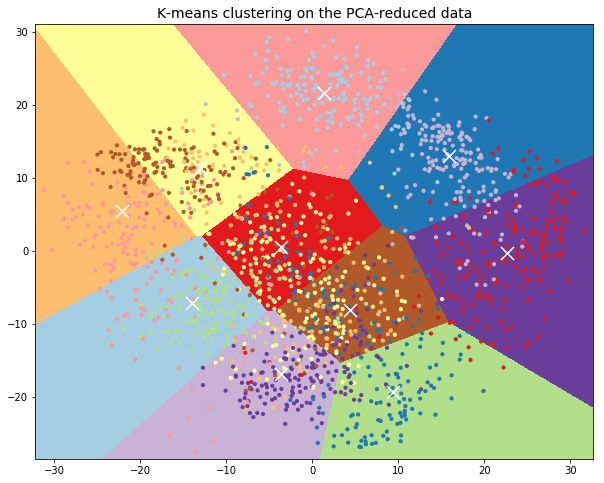

In [5]:
'''
Réaliser un clustering par K-moyennes de la base de données en utilisant les cractéristiques en 2D obtenues par PCA.
'''
kmeans = KMeans(n_clusters=n_digits, n_init=10)
kmeans.fit(X_pca)

plt.figure(figsize=(10,8))

# Plot the K-means predicting areas:
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

# Plot the K-means clustering centers:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the PCA-reduced data', fontsize=14)

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, c=y, cmap=plt.cm.Paired)

## 2 Extraction de caractéristiques faciales

On envisage ici l'utilisation des techniques de décomposition par PCA et NMF pour l'extraction de caractéristiques utiles à la reconnaissance automatique de visages.

 - Étudier et tester le script ci-dessous. 

 - Analyser le type de décomposition obtenu par NMF en comparaison avec celui obtenu par PCA. 


In [2]:
from time import time
from numpy.random import RandomState

from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

On commence par préparer les données et définir quelques fonctions utilitaires :

Dataset consists of 400 faces
2061 negative-valued pixels
2773 negative-valued pixels
2630 negative-valued pixels
1422 negative-valued pixels
1242 negative-valued pixels
1004 negative-valued pixels
2049 negative-valued pixels
1580 negative-valued pixels
1387 negative-valued pixels
3819 negative-valued pixels


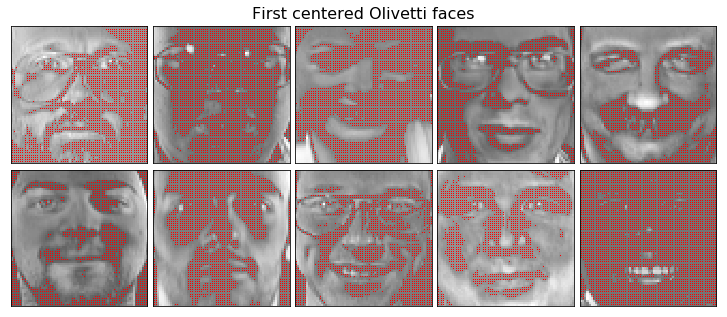

In [8]:
# -- Prepare data and define utility functions 
n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(data_home='./tmp',shuffle=True,
                               random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

faces_centered = faces - faces.mean(axis=0, dtype=np.float64)

print "Dataset consists of %d faces" % n_samples

def plot_gallery(title, images):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)

        comp = comp.reshape(image_shape)  # comp (64,64)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp<0)  # dmy: tuple (x-index of the negative numbers,y-index...)
        if len(dmy[0])>0:  # if there exist negative numbers
            yz, xz = dmy
        comp[comp<0] = 0   # set the negative numbers as zero

        plt.imshow(comp, cmap=plt.cm.gray, vmax=vmax, vmin=vmin)

        if len(dmy[0])>0:
            plt.plot( xz, yz, 'r,', hold=True)
            print len(dmy[0]), "negative-valued pixels"

        plt.xticks(())
        plt.yticks(())

    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Plot a sample of the input data
# Take the first n_components samples to plot
plot_gallery("First centered Olivetti faces",
             faces_centered[:n_components])

On définit les méthodes à tester et leur paramétrisation, à compéter par vos soins :

In [9]:
# -- Decomposition methods 

# List of the different estimators and whether to center the data

estimators = [
    ('pca', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=10),
     True),

    ('nmf', 'Non-negative components - NMF',
     decomposition.NMF(n_components=10),
     False)
]

Et on applique à la base de données d'images :

Extracting the top 10 Eigenfaces - PCA...
done in 0.107s
(10, 4096)
3998 negative-valued pixels
2078 negative-valued pixels
1967 negative-valued pixels
1862 negative-valued pixels
2261 negative-valued pixels
1924 negative-valued pixels
1951 negative-valued pixels
1884 negative-valued pixels
2221 negative-valued pixels
2127 negative-valued pixels
0.8425
Extracting the top 10 Non-negative components - NMF...
done in 2.855s
(10, 4096)
0.8825


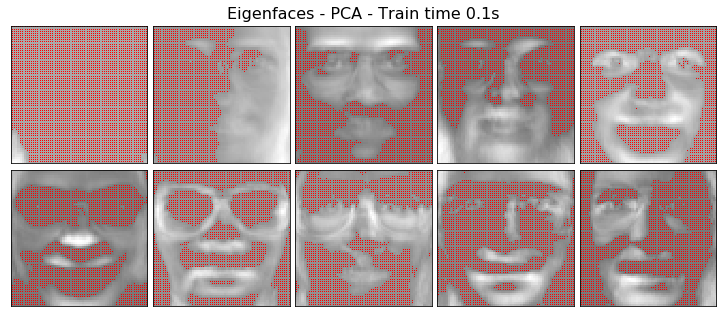

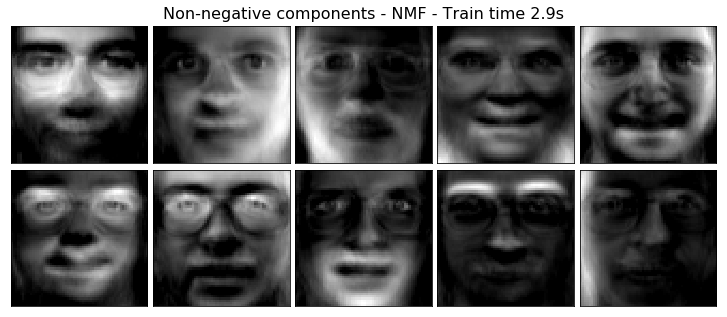

In [10]:
# -- Transform

labels = dataset.target
X = faces
X_ = faces_centered

for shortname, name, estimator, center in estimators:
    #if shortname != 'nmf': continue
    print "Extracting the top %d %s..." % (n_components, name)
    t0 = time()

    data = X
    if center:
        data = X_

    data = estimator.fit_transform(data)

    train_time = (time() - t0)
    print "done in %0.3fs" % train_time

    components_ = estimator.components_
    print components_.shape

    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])
    
    LDA = LinearDiscriminantAnalysis(n_components=n_components)
    scores = cross_val_score(LDA, data, labels, cv=10)
    print scores.mean()

### A faire 

Modifier le script pour **réaliser une évaluation des performances d'un système de reconnaissance automatique de visages** utilisant les caractéristiques extraites par PCA, **comparées** à celles obtenues par un système exploitant les caractéristiques extraites par NMF. 

On pourra utiliser la LDA ou la régression logistique pour la classification. 

On effectuera l'évaluation par **validation croisée**. 

On observera l'évolution des scores en faisant **varier le nombre de composantes** utilisé dans les décompositions.


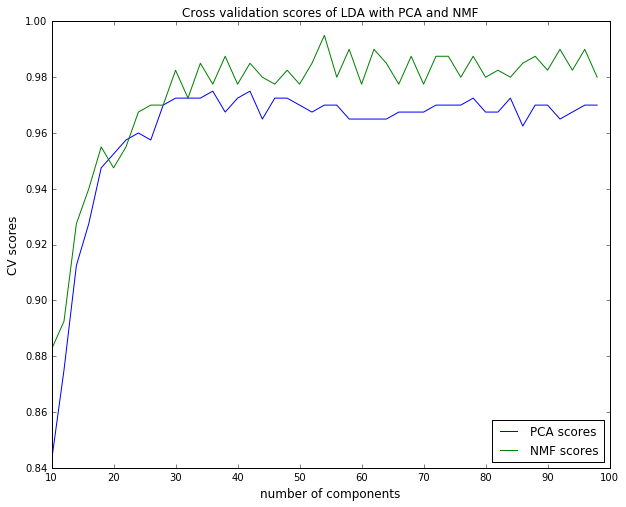

done in 250.683s


In [7]:
t0 = time()
n_components = np.arange(10, 100, 2) 
pca_scores, nmf_scores = [], []
for n in n_components:
#     PCA:
    data = X_
    PCA = decomposition.PCA(n_components=n)
    data = PCA.fit_transform(data)
    LDA = LinearDiscriminantAnalysis(n_components=n)
    score = np.mean(cross_val_score(LDA, data, labels, cv=10, n_jobs=-1))
    pca_scores.append(score)

#     NMF:
    data = X
    NMF = decomposition.NMF(n_components=n)
    data = NMF.fit_transform(data)
    LDA = LinearDiscriminantAnalysis(n_components=n)
    score = np.mean(cross_val_score(LDA, data, labels, cv=10, n_jobs=-1))
    nmf_scores.append(score)

plt.figure(figsize=(10,8))
plt.plot(n_components, pca_scores, label="PCA scores")
plt.plot(n_components, nmf_scores, label="NMF scores")
plt.xlabel('number of components', fontsize=12)
plt.ylabel('CV scores', fontsize=12)
plt.legend(loc='lower right')
plt.title("Cross validation scores of LDA with PCA and NMF")
plt.show()
train_time = (time() - t0)
print "done in %0.3fs" % train_time

The figure shows that NMF decomposition has a better performence than PCA. This is because there are no negative value in decomposed matrix. And nonnegatinity induces sparsity, which is good for large-scale calculation; it also leads to part-based decompositions.

## 3 Extraction de thèmes à partir de textes

Il s'agit dans cette partie de tester l'utilisation de la NMF pour l'extraction de thèmes à partir d'un corpus de textes ; l'idée principale étant d'interpréter chaque composante NMF extraite comme étant associée à un thème.

Étudier et tester le script suivant :

In [3]:
from sklearn.feature_extraction import text

On commence par définir quelques paramètres d'expérience : 

In [4]:
n_samples = 1000
n_features = 900
n_topics = 4
n_top_words = 20

 On charge les textes de certaines catégories du corpus [20newsgroups](http://qwone.com/~jason/20Newsgroups/) :

In [5]:
from sklearn import datasets
# Load the 20 newsgroups dataset 

t0 = time()

# Load some categories from the training set
categories = ['rec.sport.baseball','comp.graphics', 'comp.sys.mac.hardware',
              'talk.religion.misc']

print "Loading dataset..."
dataset = datasets.fetch_20newsgroups(data_home='./data/text/', shuffle=True,
                                      categories=categories, random_state=1)

print "done in %0.3fs." % (time() - t0)

Loading dataset...
done in 0.809s.


On représente chaque document par sa [TF-IDF](https://fr.wikipedia.org/wiki/TF-IDF) : 

In [6]:
# vectorize data using the most common word
# frequency with TF-IDF weighting (without top 5% stop words)

print "Extracting TF-IDF features..."
t0 = time()
vectorizer = text.CountVectorizer(max_df=0.95, max_features=n_features, stop_words='english')
counts = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf = text.TfidfTransformer().fit_transform(counts)
print "done in %0.3fs." % (time() - t0)

Extracting TF-IDF features...
done in 0.301s.


In [58]:
print tfidf.toarray().shape

(1000, 900)


In [62]:
type(counts)

scipy.sparse.csr.csr_matrix

On applique la NMF :

In [7]:
# Fit the NMF model
print "Fitting the NMF model with n_samples=%d and n_features=%d..." % (
    n_samples, n_features)

t0 = time()
nmf = decomposition.NMF(n_components=n_topics,random_state=0).fit(tfidf)
print "done in %0.3fs." % (time() - t0)

Fitting the NMF model with n_samples=1000 and n_features=900...
done in 0.130s.


Et on interprète les "vecteurs de base" comme des thèmes :

In [8]:
# Inverse the vectorizer vocabulary to be able
feature_names = vectorizer.get_feature_names()

# Store the index of key words into topics_NMF which is (n_top_words,4)
topics_NMF = np.zeros((n_top_words,n_topics))
for topic_idx, topic in enumerate(nmf.components_):
    print "Topic #%d:" % topic_idx
    topics_idx = topic.argsort()[:-n_top_words - 1:-1]
    topics_NMF[:,topic_idx] = topics_idx
    print " ".join([feature_names[i] for i in topics_idx])

Topic #0:
edu year article team baseball cs players writes game university runs host nntp posting jewish good hit season games win
Topic #1:
graphics files file uk thanks ac 3d program package help ca image windows university computer need format posting use com
Topic #2:
com god jesus sandvik people christian writes bible don kent christians brian netcom koresh article life said newton just apple
Topic #3:
mac apple edu drive scsi quadra monitor problem video centris duo se problems card power drives software internal disk ram


La NMF permet donc de réaliser du clustering "doux" de documents : chaque document peut être associé à plusieurs thèmes à la fois.

## A faire

Reproduire l'expérience précédente en utilisant des GMM et en interprétant les thèmes à partir des centroïdes de chaque cluster.
 - Comparer le résultat obtenu au résultat NMF.
 - En interprétant les thèmes au travers des mots clés les plus représentatifs, repérer les thèmes pour lesquels les deux méthodes (NMF et GMM) semblent réaliser un consensus.
 - En étiquettant chaque document par les 3 thèmes les plus pertinents, avec les deux approches, proposer une méthode qui permette de caractériser le "taux d'accord" de ces deux approches quant à l'étiquetage des documents. Calculer ce "taux d'accord".

### 3.1 Reproduire l'expérience précédente avec GMM

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import normalize

In [10]:
# Fit the GMM model
print "Fitting the NMF model with n_samples=%d and n_features=%d..." % (
    n_samples, n_features)
t0 = time()
gmm = GaussianMixture(n_components=n_topics,random_state=98).fit(tfidf.toarray())
print "done in %0.3fs." % (time() - t0)

# Store the index of key words into topics_GMM which is (n_top_words,n_topics)
topics_GMM = np.zeros((n_top_words,n_topics))
for topic_idx, topic in enumerate(gmm.means_):
    print "Topic #%d:" % topic_idx
    topics_idx = topic.argsort()[:-n_top_words - 1:-1]
    topics_GMM[:,topic_idx] = topics_idx
    print " ".join([feature_names[i] for i in topics_idx])

Fitting the NMF model with n_samples=1000 and n_features=900...
done in 1.092s.
Topic #0:
com god jesus edu people christian sandvik writes article bible koresh morality don christians brian say said know just think
Topic #1:
edu year team baseball article players game writes com cs university jewish runs hit season braves posting host win games
Topic #2:
graphics com edu uk files university thanks posting file ac nntp host help need image program computer 3d ca format
Topic #3:
edu mac apple drive quadra monitor com university scsi posting problem centris cleveland host nntp video cwru duo article modem


### 3.2 Comparer le résultat obtenu à partir des mots clés communs sur les deux méthodes.

Quelques explaination:
- idx_map: For each different random_state, the corresponding colomn index of NMF and GMM may be different. The array idx_map serves to map the index in GMM to NMF, for example, idx_map = [1,2,0,3] --> Topic 1,2,0,3 in GMM corresponds to Topic 0,1,2,3 in NMF.
- In the following step, we map the index of NMF and GMM to the array "categories" with idx_map_NMF, idx_map_GMM.

In [11]:
print "categories: ",categories
print "\nCommon words in each topic:"
idx_map = [] 
for i in range(n_topics):
    n_max = 0 # the max number of corresponding elements
    j_max = 0
    GMM_cor_idx = 0 # the corresponding GMM index with NMF 
    for j in range(n_topics):
        # to return an array of type boolean, if element in NMF is also in GMM -> True
        NMFinGMM = np.in1d(topics_NMF[:,i],topics_GMM[:,j],assume_unique=True) 
        common_idx = np.nonzero(NMFinGMM)[0]
        
        # to decide which colomn in GMM is corresponding to the i_th colomn in NMF
        if(common_idx.shape[0]>n_max):
            n_max = common_idx.shape[0]
            j_max = j
            common = (topics_NMF[:,i][common_idx]).astype(int)
    idx_map.append(j_max)
    print "Topic #%d in NMF | Topic #%d in GMM:" % (i,j_max)
    print "Number of common words: ",n_max
    print " ".join([feature_names[k] for k in common])

categories:  ['rec.sport.baseball', 'comp.graphics', 'comp.sys.mac.hardware', 'talk.religion.misc']

Common words in each topic:
Topic #0 in NMF | Topic #1 in GMM:
Number of common words:  18
edu year article team baseball cs players writes game university runs host posting jewish hit season games win
Topic #1 in NMF | Topic #2 in GMM:
Number of common words:  17
graphics files file uk thanks ac 3d program help ca image university computer need format posting com
Topic #2 in NMF | Topic #0 in GMM:
Number of common words:  15
com god jesus sandvik people christian writes bible don christians brian koresh article said just
Topic #3 in NMF | Topic #3 in GMM:
Number of common words:  11
mac apple edu drive scsi quadra monitor problem video centris duo


Le résultat a montré qu'il y a 18 "term de consensus" sur Topic #0, et ce topic est plus proche que category 'rec.sport.baseball'.<br>
De même, Topic #1 est correspondant au category 'comp.graphics';<br>
Topic #2 est correspondant au category 'talk.religion.misc';<br>
Topic #3 est correspondant au category 'comp.sys.mac.hardware'.

In [13]:
# idx_map_NMF and idx_map_GMM:
idx_map_NMF = np.array([0,1,3,2])
idx_map_GMM = np.array([1,2,3,0])

### 3.3 Étiqueter chaque document par les 3 thèmes les plus pertinents et calculer ce "taux d'accord

#### Étape 1 - Préparation: Car la méthode predict_proba de GaussianMixture ne fonctionne pas ici, on défine une méthode pour calculer le proba.

In [25]:
def GMM_proba(X,n_topics):
    '''
    Calculate the distances between a sample and the four bases(topics):
    Input: X(n_samples,n_features), n_topics
    bases:  means_(n_components,n_features) 
    Return: proba(n_samples,n_components) (each element in this matrix is the distance between a specific sample and those 4 topics)
    '''
    n_samples, n_features = X.shape
    gmm = GaussianMixture(n_components=n_topics,random_state=98).fit(X)
    proba_0 = (gmm.means_).dot(X.T).T
    diag =  np.diag(1./(np.sum(proba_0,1)))
    proba = diag.dot(proba_0)
    return proba

#### Étape 2 - Obtenir les matrices W de NMF et GMM et Map la matrice W de GMM:

In [26]:
X = tfidf.toarray()
n_topics = 4

w_GMM = GMM_proba(X,n_topics)
w_NMF = decomposition.NMF(n_components=n_topics,random_state=0).fit_transform(X)
# Normalization:
w_NMF_normalized = (np.diag(1./(np.sum(w_NMF,1)))).dot(w_NMF)

# Map:
w_NMF_mapped = w_NMF_normalized[:,idx_map_NMF]
w_GMM_mapped = w_GMM[:,idx_map_GMM]

print "The probability matrix of NMF is:\n",w_NMF_mapped
print "\nThe probability matrix of GMM is:\n",w_GMM_mapped
print "\nMatrix shape: ",w_GMM_mapped.shape

The probability matrix of NMF is:
[[ 0.08906359  0.86683373  0.04410268  0.        ]
 [ 0.43758273  0.24621248  0.23323491  0.08296987]
 [ 1.          0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.02976051  0.97023949]
 [ 0.26315837  0.          0.73684163  0.        ]
 [ 0.          0.69887927  0.0734659   0.22765483]]

The probability matrix of GMM is:
[[ 0.21281835  0.37929019  0.24177108  0.16612039]
 [ 0.25876622  0.21070399  0.28560578  0.24492401]
 [ 0.58693992  0.13599649  0.12976128  0.14730231]
 ..., 
 [ 0.15695924  0.12315666  0.18701509  0.53286902]
 [ 0.19991673  0.17606213  0.46675494  0.15726621]
 [ 0.11946957  0.3587965   0.2452212   0.27651273]]

Matrix shape:  (1000, 4)


#### Étape 3 - Trouver les 3 thèmes les plus pertinent, NMF et GMM:

In [27]:
print "Topic 0,1,2,3 now is corresponding to:\n",categories

n_top_topic = 3

topic_NMF = []
topic_GMM = []
# We print the first 3 colomn, but we stock all the index for the next step
for document_idx, topic in enumerate(w_NMF_mapped):
    document_idx = topic.argsort()[:-(n_top_topic+1) -1:-1]
    topic_NMF.append(document_idx)
topic_NMF = np.array(topic_NMF)

for document_idx, topic in enumerate(w_GMM_mapped):
    document_idx = topic.argsort()[:-(n_top_topic+1) -1:-1]
    topic_GMM.append(document_idx)
topic_GMM = np.array(topic_GMM)

print "For each document, their labels of topic in NMF is:\n",topic_NMF[:,0:3]
print "For each document, their labels of topic in NMF is:\n",topic_GMM[:,0:3]
print "\nMatrix shape: ",topic_GMM[:,0:3].shape

Topic 0,1,2,3 now is corresponding to:
['rec.sport.baseball', 'comp.graphics', 'comp.sys.mac.hardware', 'talk.religion.misc']
For each document, their labels of topic in NMF is:
[[1 0 2]
 [0 1 2]
 [0 3 2]
 ..., 
 [3 2 1]
 [2 0 3]
 [1 3 2]]
For each document, their labels of topic in NMF is:
[[1 2 0]
 [2 0 3]
 [0 3 1]
 ..., 
 [3 2 0]
 [2 0 1]
 [1 3 2]]

Matrix shape:  (1000, 3)


#### Étape 4 - Calculer le "taux d'accord" de ces deux approches:

2 méthodes de calculer le "taux d'accord" sont proposé comme ci-dessous:

- For each document, calculate the difference of probability and add the 4 absolut value. Smaller value signify a better "taux d'accord".

- For each document, the labels are sorted by probability. The "taux d'accord" is calculated by counting the agree label with a weight of their position. An example is shown below.

#### méthode probabilité

\begin{array}{c|cccc}
probability & \text{Topic 0} & \text{Topic 1} & \text{Topic 2} & \text{Topic 3}\\
\hline
NMF & a_{1} & b_{1} & c_{1} & d_{1} \\
GMM & a_{2} & b_{2} & c_{2} & d_{2} \\
\end{array}

$$disagree = |a_{1}-a_{2}| + |b_{1}-b_{2}| + |c_{1}-c_{2}| + |d_{1}-d_{2}|$$

Then we normalize the matrix into scale 0-1.<br>
The score is signified by 1-disagree.

In [28]:
disagree = np.sum(np.abs(w_NMF_mapped - w_GMM_mapped),1)
score1 = 1 - (disagree - np.min(disagree))/((np.max(disagree) - np.min(disagree)))
print score1.shape
print "The scores of first 10 documents:\n",score1[:10]
taux1 = np.mean(score1)
print "The agreement rate is: ",taux1

(1000,)
The scores of first 10 documents:
[ 0.17124883  0.6804248   0.31005782  0.40283153  0.04670744  0.70694121
  0.67879854  0.14784064  0.62434106  0.41397284]
The agreement rate is:  0.413249035589


#### méthode - voter par les thèmes 

Because for each document, the matrix topic_NMF and topic_GMM is already sorted by probability, the posation of each tag matters a lot, in another word, a result (1 0 2 3) in NMF and (3 0 2 1) in GMM is worse than (1 0 2 3) in one and (1 0 3 2) in another. A weight of (0.4, 0.3, 0.2, 0.1) is proposed here meaning that if the lable with the highest probability agrees in NMF and GMM, this vote will be given a 0.4 weight.<br> 
Below is an example:

\begin{array}{c|cccc}
Topic & \text{weight0=0.4} & \text{weight1=0.3} & \text{weight2=0.2} & \text{weight3=0.1}\\
\hline
NMF & 1 & 0 & 2 & 3 \\
GMM & 1 & 0 & 3 & 2 \\
\hline
vote & 1 & 1 & 0 & 0 \\
\end{array}

In this case, the score is $1\times 0.4 + 1\times 0.3 = 0.7$

In [24]:
weight = np.array([0.4,0.3,0.2,0.1])
score2 = np.sum((topic_NMF == topic_GMM)*weight,1)
print score2.shape
print "The scores of first 20 documents:\n",score2[:20]
taux2 = np.mean(score2)
print "The agreement rate is: ",taux2

(1000,)
The scores of first 20 documents:
[ 0.5  0.   0.7  1.   1.   0.3  1.   0.7  1.   1.   0.4  0.5  0.7  0.7  0.6
  0.3  0.4  0.7  0.4  1. ]
The agreement rate is:  0.7261
